## Predict whether Someone has Diabetes using machine learning


Using the Diabetes dataset from kaggle and using data science and machine learning model tools to create a model that predicts that 
whether a patient has diabetes or not...

Using this 5 important approach:
1.Problem definition
2.Data collection
3.Evaluation
4.Data modelling
5.Experimentation

# Problem Defintion
Based on the clinical Parameters,,whether a patient has diabetes or not??

# Data Collection
The data on the basis of which the model is trained is taken from kaggle community dataset link :- https://www.kaggle.com/datasets/iammustafatz/
diabetes-prediction-dataset

# Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has diabetes during the proof of concept, we'll pursue the project.

# Features
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative).
The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and 
blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical
history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing
diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships 
between various medical and demographic factors and the likelihood of developing diabetes.

In [1]:
# import the necessary tools to visualize the data and create the model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split , cross_val_score

In [2]:
df = pd.read_csv(r'diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
pd.crosstab(df.gender,df.age)

age,0.08,0.16,0.24,0.32,0.40,0.48,0.56,0.64,0.72,0.80,...,71.00,72.00,73.00,74.00,75.00,76.00,77.00,78.00,79.00,80.00
gender,,,,,,,,,,,,,,,,,,,,,
Female,17,23,44,38,34,47,39,51,47,42,...,479,425,451,431,416,407,435,385,356,3508
Male,19,36,43,51,32,36,57,48,57,60,...,392,365,372,333,305,326,295,297,265,2113
Other,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Filtering the data set taking the value where age>=4
filtered_df = df[df['age'] >=4]
filtered_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
filtered_df.shape

(95675, 9)

In [7]:
# to check whether the dataset contain missing data
filtered_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95675 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               95675 non-null  object 
 1   age                  95675 non-null  float64
 2   hypertension         95675 non-null  int64  
 3   heart_disease        95675 non-null  int64  
 4   smoking_history      95675 non-null  object 
 5   bmi                  95675 non-null  float64
 6   HbA1c_level          95675 non-null  float64
 7   blood_glucose_level  95675 non-null  int64  
 8   diabetes             95675 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [9]:
filtered_df['diabetes'].value_counts()

diabetes
0    87176
1     8499
Name: count, dtype: int64

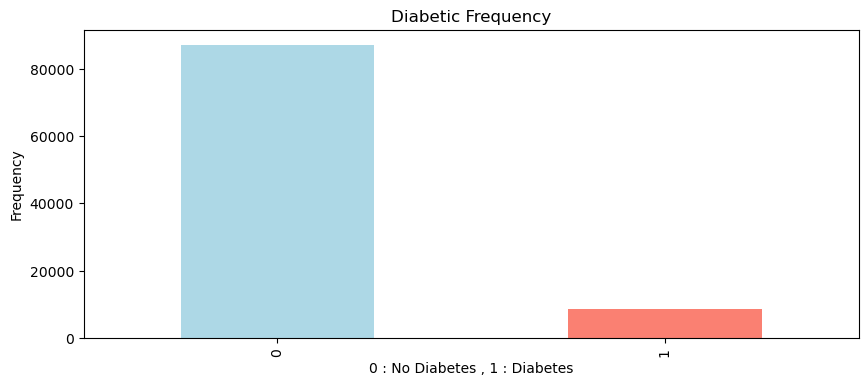

In [10]:
filtered_df['diabetes'].value_counts().plot(kind = 'bar',figsize = (10,4),color = ['lightblue','salmon'])
plt.title("Diabetic Frequency")
plt.xlabel('0 : No Diabetes , 1 : Diabetes')
plt.ylabel('Frequency');


In [11]:
pd.crosstab(filtered_df.diabetes , filtered_df.gender)

gender,Female,Male,Other
diabetes,,,
0,52007,35151,18
1,4461,4038,0


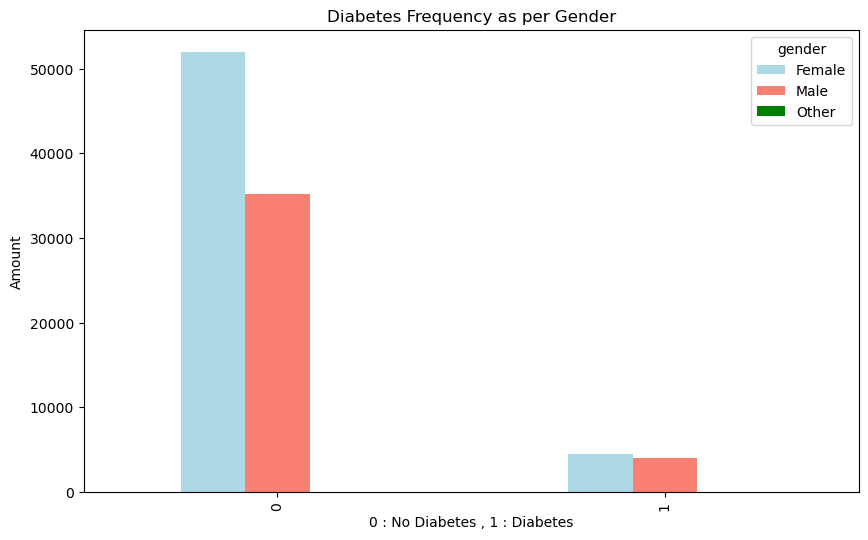

In [12]:
# Diabetes Frequency as per sex
pd.crosstab(filtered_df.diabetes ,filtered_df.gender).plot(kind = 'bar',figsize = (10,6) , color = ['lightblue','salmon','green'])
plt.title("Diabetes Frequency as per Gender")
plt.xlabel('0 : No Diabetes , 1 : Diabetes')
plt.ylabel("Amount");

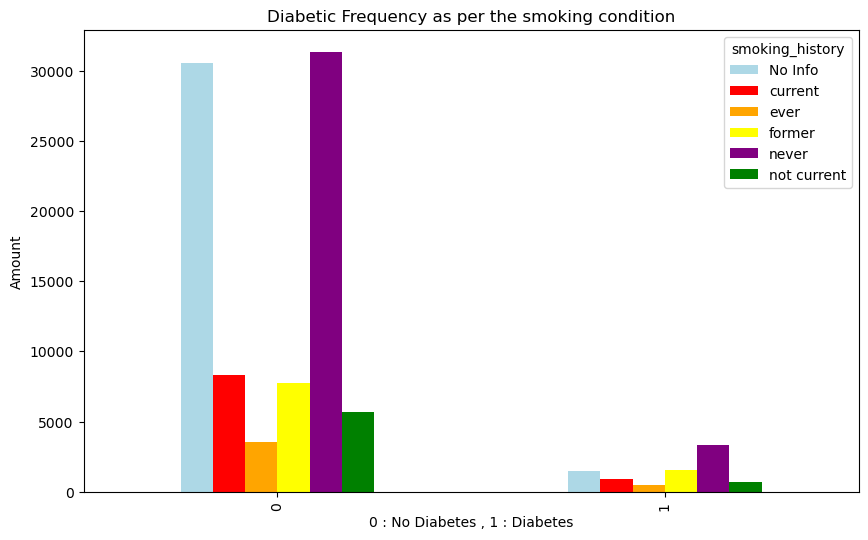

In [13]:
pd.crosstab(filtered_df.diabetes,filtered_df.smoking_history).plot(kind = 'bar',figsize = (10,6),color = ['lightblue','red','orange','yellow','purple','green'])
plt.title("Diabetic Frequency as per the smoking condition")
plt.xlabel('0 : No Diabetes , 1 : Diabetes')
plt.ylabel("Amount");

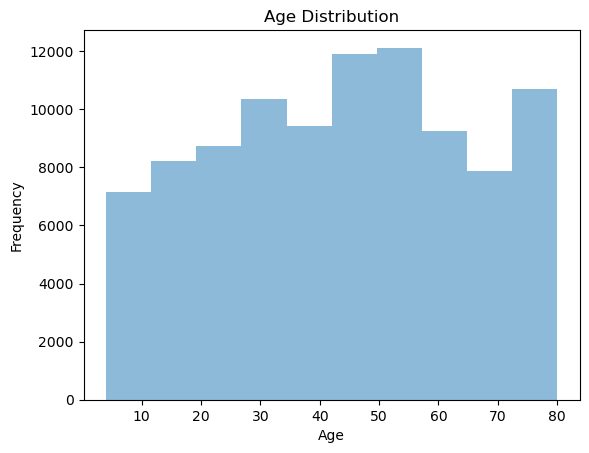

In [14]:
filtered_df.age.plot.hist(bins=10, alpha=0.5)
plt.xlabel("Age")
plt.title("Age Distribution");

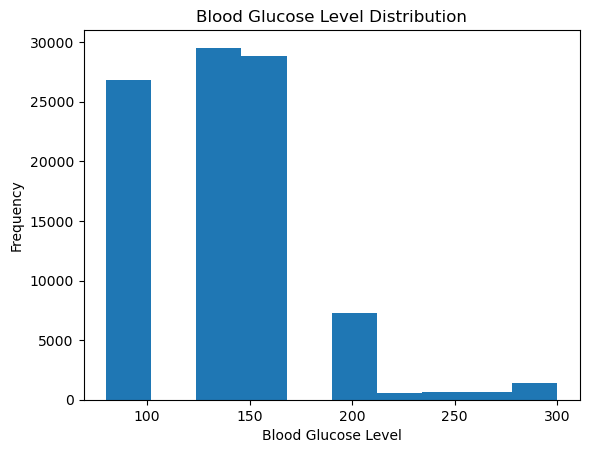

In [15]:
filtered_df.blood_glucose_level.plot.hist(bins=10)
plt.xlabel("Blood Glucose Level")
plt.title("Blood Glucose Level Distribution");

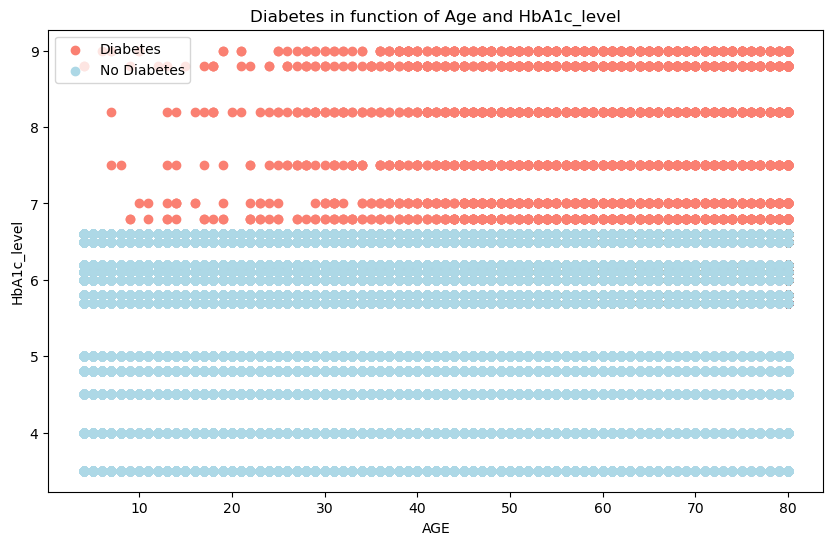

In [16]:
### HbA1c_level vs Age
# create a plot 
plt.figure(figsize=(10,6))
# scatter with positive examples
plt.scatter(filtered_df.age[filtered_df.diabetes==1],
            filtered_df.HbA1c_level[filtered_df.diabetes==1],
            c='salmon')
plt.scatter(filtered_df.age[filtered_df.diabetes==0],
            filtered_df.HbA1c_level[filtered_df.diabetes==0],
            c='lightblue')
plt.title("Diabetes in function of Age and HbA1c_level")
plt.xlabel("AGE")
plt.ylabel("HbA1c_level")
plt.legend(["Diabetes","No Diabetes"]);

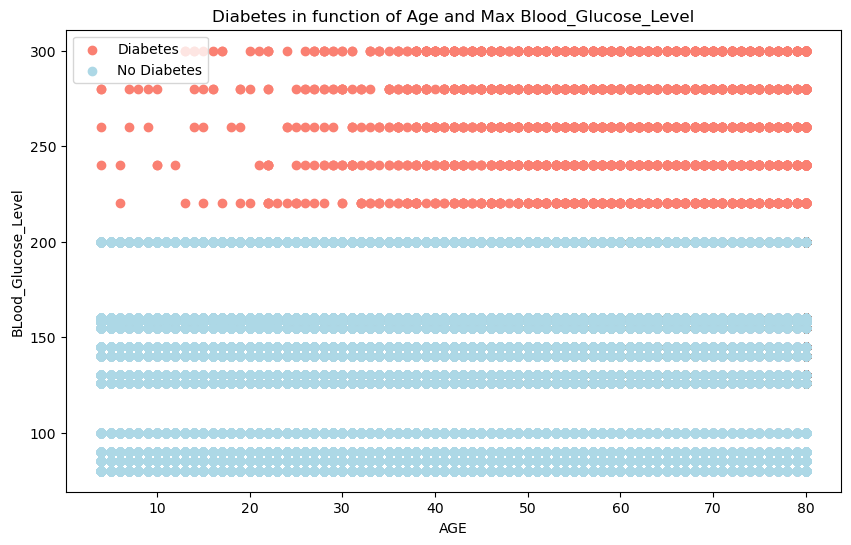

In [17]:
### Max Blood_Glucose_level vs Age
# create a plot 
plt.figure(figsize=(10,6))
# scatter with positive examples
plt.scatter(filtered_df.age[filtered_df.diabetes==1],
            filtered_df.blood_glucose_level[filtered_df.diabetes==1],
            c='salmon')
plt.scatter(filtered_df.age[filtered_df.diabetes==0],
            filtered_df.blood_glucose_level[filtered_df.diabetes==0],
            c='lightblue')
plt.title("Diabetes in function of Age and Max Blood_Glucose_Level")
plt.xlabel("AGE")
plt.ylabel("BLood_Glucose_Level")
plt.legend(["Diabetes","No Diabetes"]);

In [18]:
pd.crosstab(filtered_df.heart_disease,filtered_df.diabetes)

diabetes,0,1
heart_disease,,
0,84502,7232
1,2674,1267


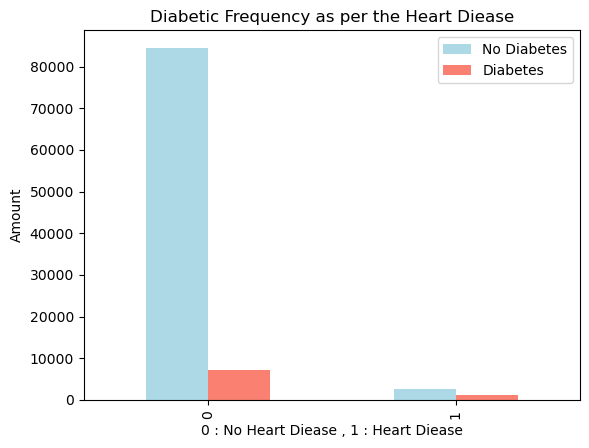

In [19]:
pd.crosstab(filtered_df.heart_disease,filtered_df.diabetes).plot(kind = 'bar',color = ['lightblue','salmon'])
plt.title("Diabetic Frequency as per the Heart Diease")
plt.xlabel('0 : No Heart Diease , 1 : Heart Diease')
plt.ylabel("Amount")
plt.legend(['No Diabetes','Diabetes']);

In [20]:
# Create a mapping dictionary
gender_mapping = {'Male': 1, 'Female': 0}
# Create a mapping dictionary for smoking status
smoking_mapping = {
    'never': 0,
    'No Info': 1,
    'former': 2,
    'current': 3,
    'not current': 4,
    'ever': 5
}
# Apply the mapping and fill non-matching values with 2
filtered_df_new = filtered_df.copy()  # Create a copy of filtered_df to avoid modifying the original DataFrame
filtered_df_new['gender'] = filtered_df_new['gender'].map(gender_mapping).fillna(2)


# Apply the mapping and fill non-matching values with -1
filtered_df_new['smoking_history'] = filtered_df_new['smoking_history'].map(smoking_mapping).fillna(-1)

# Display the new DataFrame
filtered_df_new

# Display the new DataFrame
filtered_df_new.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0,25.19,6.6,140,0
1,0.0,54.0,0,0,1,27.32,6.6,80,0
2,1.0,28.0,0,0,0,27.32,5.7,158,0
3,0.0,36.0,0,0,3,23.45,5.0,155,0
4,1.0,76.0,1,1,3,20.14,4.8,155,0


In [21]:
filtered_df_new.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.015247,0.017340,0.081555,0.059559,-0.013086,0.022382,0.019324,0.041318
age,-0.015247,1.000000,0.247101,0.234868,0.096057,0.263436,0.101017,0.108438,0.252880
hypertension,0.017340,0.247101,1.000000,0.119015,0.019599,0.137864,0.081029,0.083997,0.194690
heart_disease,0.081555,0.234868,0.119015,1.000000,0.058521,0.051816,0.067852,0.069930,0.169502
smoking_history,0.059559,0.096057,0.019599,0.058521,1.000000,0.047353,0.016088,0.016190,0.040530
bmi,-0.013086,0.263436,0.137864,0.051816,0.047353,1.000000,0.081064,0.088464,0.206940
HbA1c_level,0.022382,0.101017,0.081029,0.067852,0.016088,0.081064,1.000000,0.172139,0.407244
blood_glucose_level,0.019324,0.108438,0.083997,0.069930,0.016190,0.088464,0.172139,1.000000,0.425052
diabetes,0.041318,0.252880,0.194690,0.169502,0.040530,0.206940,0.407244,0.425052,1.000000


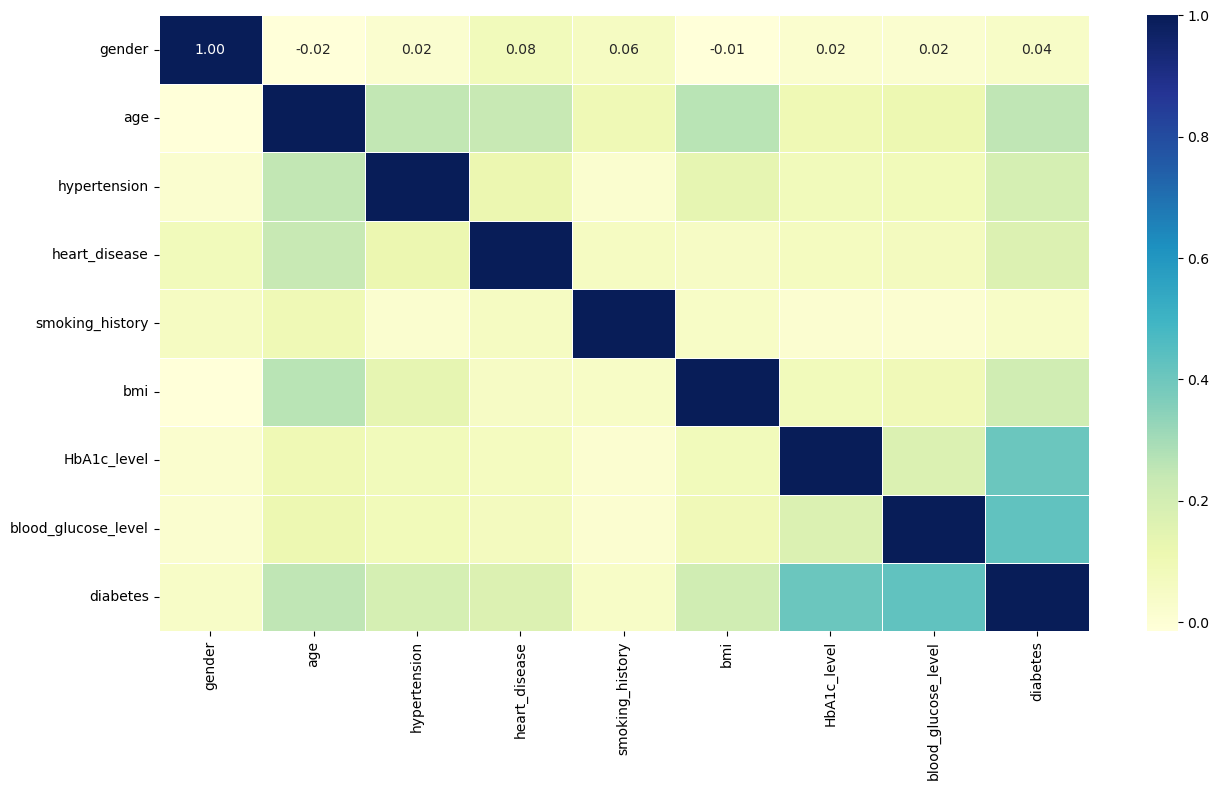

In [22]:
## lets make correlation matrix a little prettiers
cor_matrix = filtered_df_new.corr()
fig,ax = plt.subplots(figsize=(15,8))
ax=sns.heatmap(cor_matrix,
               annot=True,
               annot_kws={"size": 10},
               linewidths = 0.5,
               fmt = '.2f',
               cmap='YlGnBu')

## Modeling

In [23]:
# split the data
x = filtered_df_new.drop("diabetes",axis=1)
y = filtered_df_new['diabetes']
x.shape , y.shape

((95675, 8), (95675,))

In [24]:
# split the data into training and test data 
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
83704,1.0,36.0,0,0,4,27.32,4.8,126
74043,0.0,43.0,0,0,0,21.97,5.8,100
30422,1.0,45.0,0,0,3,27.32,6.1,140
2827,0.0,20.0,0,0,0,26.63,6.1,200
69910,1.0,65.0,0,0,1,27.32,5.8,100
...,...,...,...,...,...,...,...,...
6528,1.0,79.0,0,1,2,27.32,5.8,130
57361,0.0,66.0,0,0,0,27.79,5.8,200
80283,1.0,53.0,0,0,1,28.04,3.5,100
908,0.0,80.0,0,0,0,27.32,6.2,140


In [26]:
x_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
60761,0.0,23.0,0,0,0,23.55,6.5,145
58189,1.0,45.0,0,0,1,26.62,3.5,159
47864,1.0,45.0,0,1,1,46.34,6.2,200
35450,0.0,28.0,0,0,0,27.54,6.6,80
21695,1.0,21.0,0,0,1,27.32,6.5,140
...,...,...,...,...,...,...,...,...
85290,1.0,80.0,0,1,2,27.32,4.0,200
67579,1.0,51.0,0,0,2,23.71,3.5,140
34184,1.0,13.0,0,0,0,15.55,3.5,100
30143,1.0,13.0,0,0,1,22.95,6.0,140


In [27]:
y_train

83704    0
74043    0
30422    0
2827     0
69910    0
        ..
6528     0
57361    0
80283    0
908      0
16503    1
Name: diabetes, Length: 76540, dtype: int64

# Now TO Predict whether someone has diabetes or Not We can use three models which are used for binary classification
> LogisticRegression
> RandomForestCLassifer
> K-Nearest Neighbours Classifier


In [28]:
# create a dictionary for this models
d = {"LogisticRegression" : LogisticRegression(),
     "RandomForestClassifier": RandomForestClassifier(),
     "K-NearestCLassifier":KNeighborsClassifier()}
def fit_score_model(models,x_train,x_test,y_train,y_test):
    """
    fit and evaluate given machine learning models.
    model : a dict of differemt scikit learn machine learning models
    x_train: training data (no labels)
    x_test: testing data(no labels)
    y_train: training labels
    y_test: test labels
    """
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score


In [29]:
model_scores=fit_score_model(d,x_train,x_test,y_train,y_test)
model_scores

C:\Users\user\Desktop\sample_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.9524954272275934,
 'RandomForestClassifier': 0.9683302848183956,
 'K-NearestCLassifier': 0.9509798798014111}

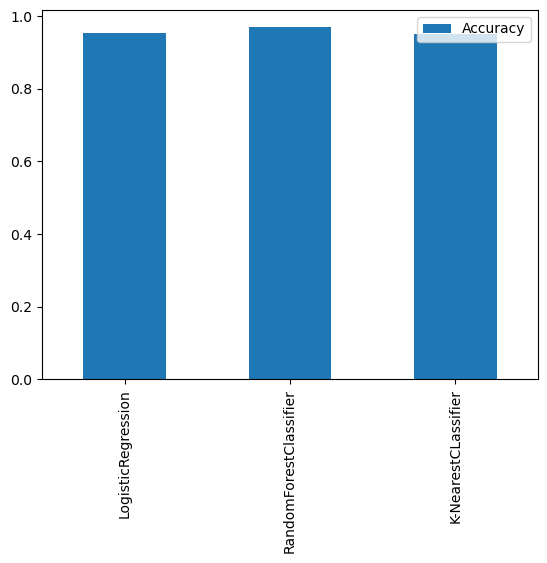

In [30]:
# model comparison
model_comp = pd.DataFrame(model_scores,index = ['Accuracy'])
model_comp.T.plot.bar();

# As the Accuracy of RandomFOrestCLassifier model is highest among all 
# so let us take RandomForestClassifier and try to improve the model by hyperparamter tuning


In [31]:
# create a hyperparamter grid
rfc_grid = {"n_estimators":np.arange(10,100,10),
            "max_depth":[None,3,5,10],
            "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}

## using RandomizedSearchCV

In [32]:
np.random.seed(42)
rfc_log_grd = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions = rfc_grid,
                                 n_iter=20,
                                 cv=5,
                                 verbose=True)
rfc_log_grd.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [33]:
rfc_log_grd.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_depth': None}

In [34]:
rfc_log_grd.score(x_test,y_test)

0.9708910373660831

In [35]:
model_scores["RandomForestClassifier"]

0.9683302848183956

## Now Using GridSearchCV

In [36]:
rfc_grid_c = GridSearchCV(RandomForestClassifier(),
                        param_grid=rfc_grid,
                        cv=5,
                        verbose=2,
                        refit=True)
rfc_grid_c.fit(x_train,y_train)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.7s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=2)

In [52]:
rfc_grid_c.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 14,
 'n_estimators': 50}

In [53]:
rfc_grid_c.score(x_test,y_test)

0.9704206950614058

## Evaluate the tuned machine learning model beyond accuracy

# We have taken the RandomizedSeachCv tuned model as its accuracy is highest among all the tuned models i.e 0.97089

In [37]:
y_preds = rfc_log_grd.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import roc_curve

In [39]:
y_probs = rfc_log_grd.predict_proba(x_test)
y_positive = y_probs[:,1]


In [40]:
fpr , tpr , thresholds = roc_curve(y_test, y_positive)
fpr[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

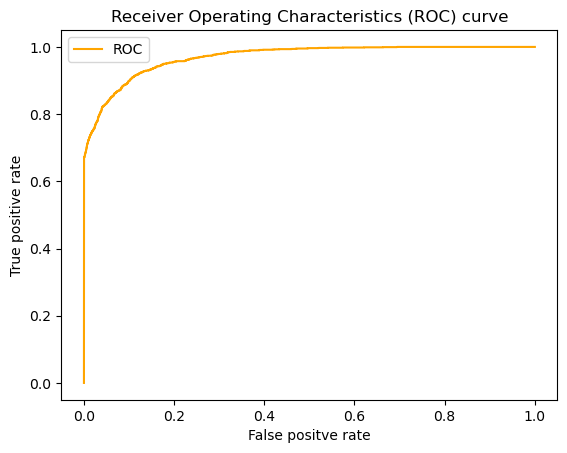

In [41]:
def plot_roc(fpr,tpr):
    """ Plot a ROC curve given the false positive rate and true positive rate of a model"""
    plt.plot(fpr,tpr,color = 'orange',label = 'ROC')

    #plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label = 'Guessing')

    plt.xlabel("False positve rate")
    plt.ylabel("True positive rate")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc(fpr,tpr)

In [42]:
# Confusion Matrix
confusion_matrix(y_test,y_preds)

array([[17455,     5],
       [  552,  1123]], dtype=int64)

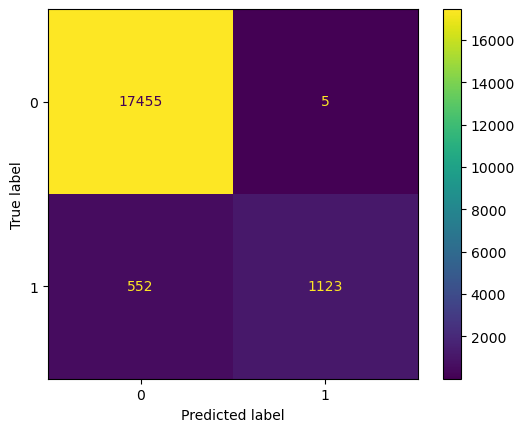

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                    y_pred = y_preds)    ;

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17460
           1       1.00      0.67      0.80      1675

    accuracy                           0.97     19135
   macro avg       0.98      0.84      0.89     19135
weighted avg       0.97      0.97      0.97     19135



In [60]:
print(classification_report(y_test,y_preds_grid))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17460
           1       0.98      0.67      0.80      1675

    accuracy                           0.97     19135
   macro avg       0.98      0.84      0.89     19135
weighted avg       0.97      0.97      0.97     19135



In [45]:
rfc_log_grd.best_params_

{'n_estimators': 80,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'max_depth': None}

In [46]:
clf = RandomForestClassifier(n_estimators= 80,
 min_samples_split=14,
 min_samples_leaf= 11,
 max_depth=None)

In [47]:
cv_a = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='accuracy')
cv_a = np.mean(cv_a)
cv_a

0.9707342565978573

In [48]:
cv_p = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='precision')
cv_p = np.mean(cv_p)
cv_p

0.997738366243809

In [49]:
cv_r = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='recall')
cv_r = np.mean(cv_r)
cv_r

0.6712559637156805

In [50]:
cv_f = cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='f1')
cv_f = np.mean(cv_f)
cv_f

0.8035428065944243

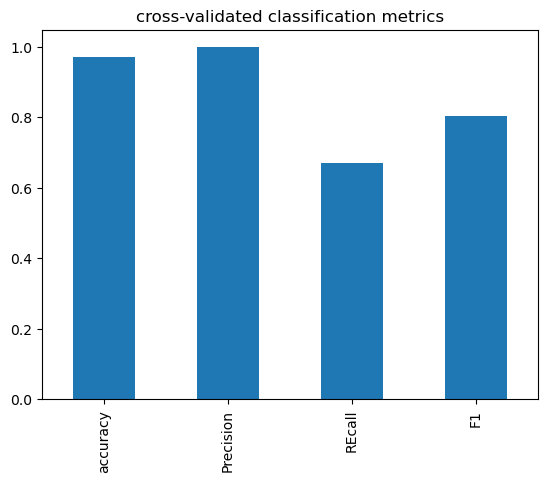

In [51]:
cv_metrics = pd.DataFrame({
    "accuracy":cv_a,
    "Precision":cv_p,
    "REcall":cv_r,
    "F1":cv_f},
    index=[0])
cv_metrics.T.plot.bar(title = "cross-validated classification metrics",
                      legend=False);

In [62]:
import pickle
pickle.dump(rfc_log_grd,open("Diabetic_prediction_model.pkl",'wb'))